# Phase One: Data Preparation and Analysis

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import chardet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Acquisition

Load the dataset and display the first few entries to understand the basic structure of the data.

In [2]:
# Detect the encoding
with open('../dataset/SeoulBikeData.csv', 'rb') as file:
    encoding_result = chardet.detect(file.read())

In [3]:
data = pd.read_csv('../dataset/SeoulBikeData.csv', encoding=encoding_result['encoding'])

In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## 3. Data Exploration

### Summary statistics of numerical columns

Display summary statistics to understand the distribution of numerical data.

In [6]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Check for missing values

Identify any missing values in the dataset.

In [7]:
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


### Convert Date column to datetime

Convert `Date` columns from string format to datetime, which is more suitable for analysis.

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Convert categorical columns

Ensure categorical columns are treated as category dtype.

In [9]:
data['Seasons'] = data['Seasons'].astype('category')
data['Holiday'] = data['Holiday'].astype('category')
data['Functioning Day'] = data['Functioning Day'].astype('category')
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Extract month, day of the week

Extract more useful features from the 'Date' column.

In [10]:
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,DayOfWeek
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,4


## 4. Exploratory Data Analysis (EDA)

### Visualizing the Target Variable (Rented Bike Count)

Visualize the distribution of the target variable to understand its characteristics.

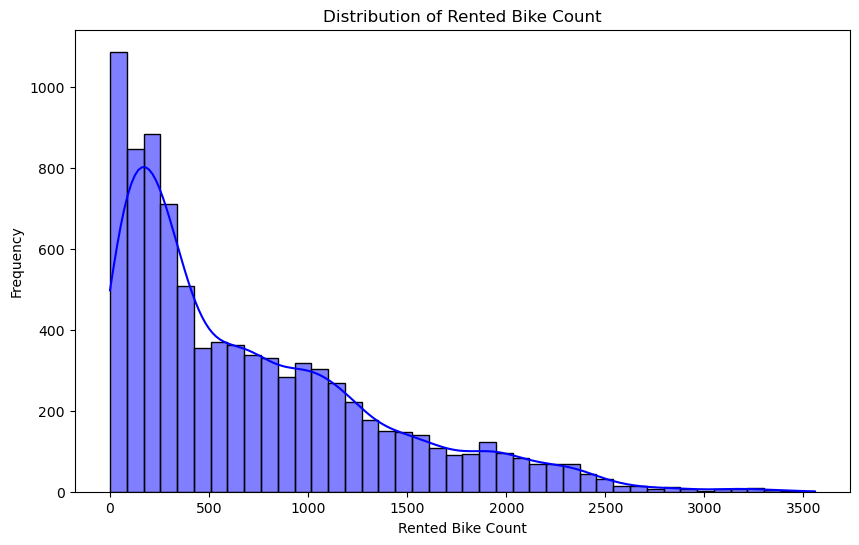

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rented Bike Count'], kde=True, color='blue')
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

### Correlation Matrix

Generate and plot a correlation matrix to explore potential relationships between features.

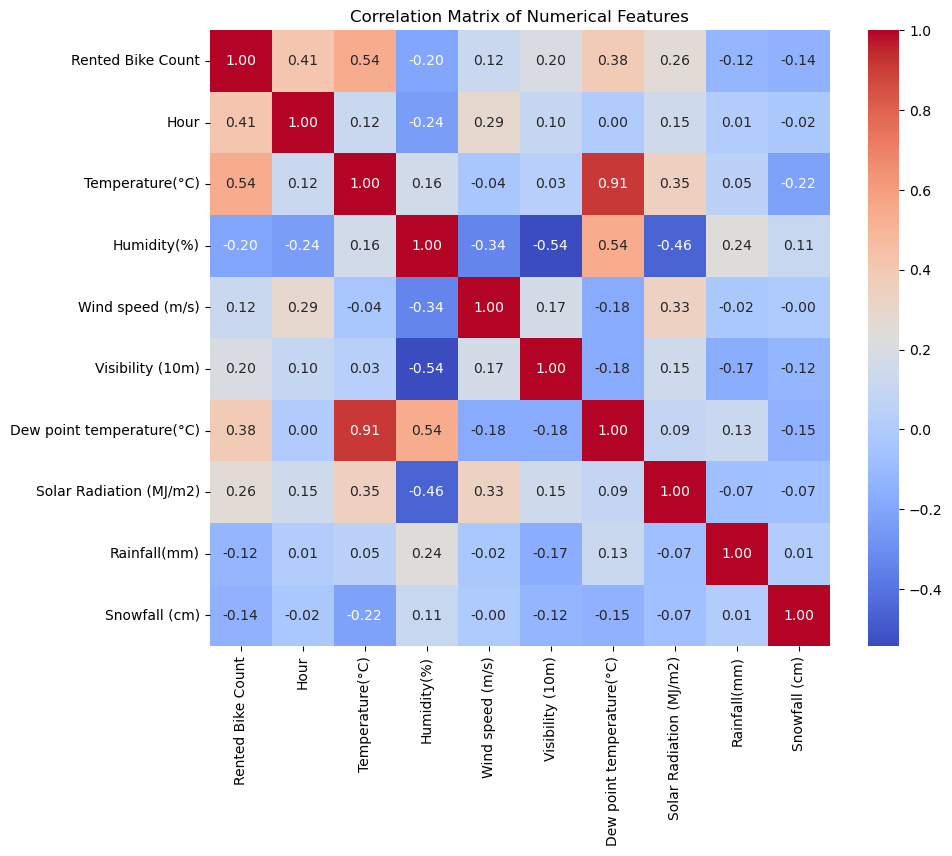

In [12]:
# Select only numerical columns (float64 and int64)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix for these numerical columns
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Relationships Between 

Scatter Plot of Temperature vs Rented Bike Count

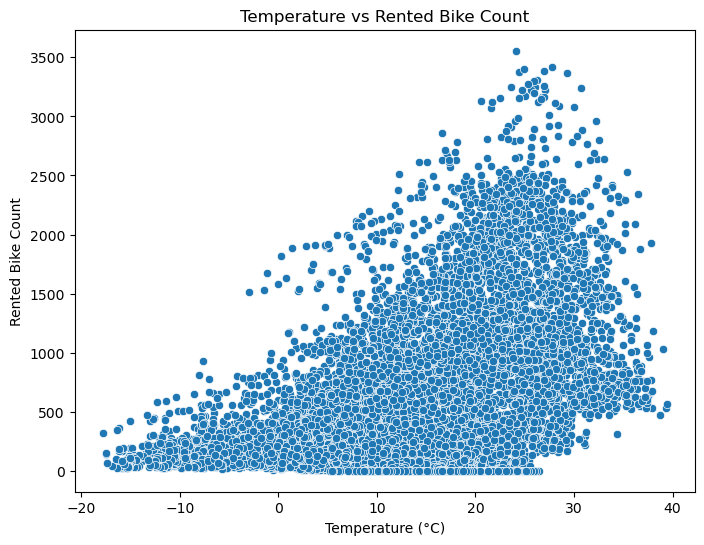

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=data)
plt.title('Temperature vs Rented Bike Count')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()

#### Scatter plot of Humidity vs Rented Bike Count

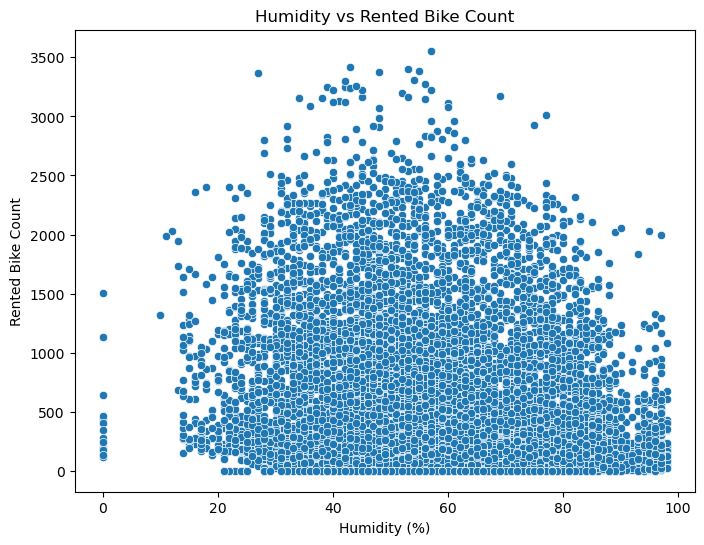

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Humidity(%)', y='Rented Bike Count', data=data)
plt.title('Humidity vs Rented Bike Count')
plt.xlabel('Humidity (%)')
plt.ylabel('Rented Bike Count')
plt.show()

#### Bar plot for Seasons vs Rented Bike Count

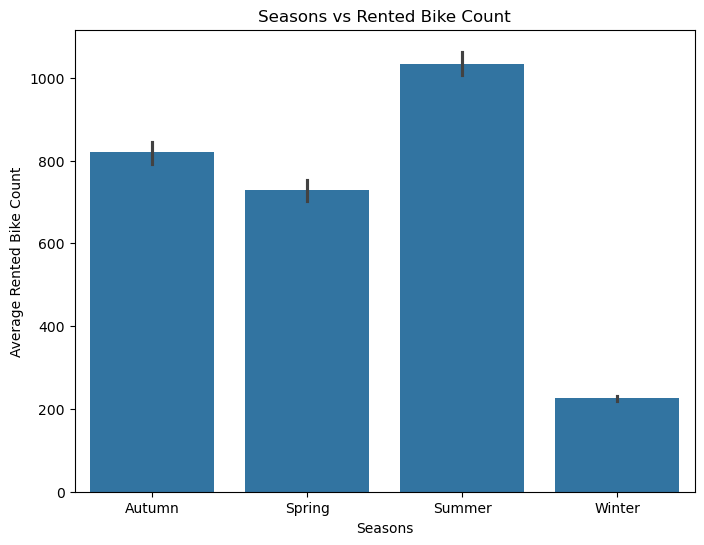

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Seasons', y='Rented Bike Count', data=data)
plt.title('Seasons vs Rented Bike Count')
plt.xlabel('Seasons')
plt.ylabel('Average Rented Bike Count')
plt.show()

#### Bar plot for Holiday vs Rented Bike Count

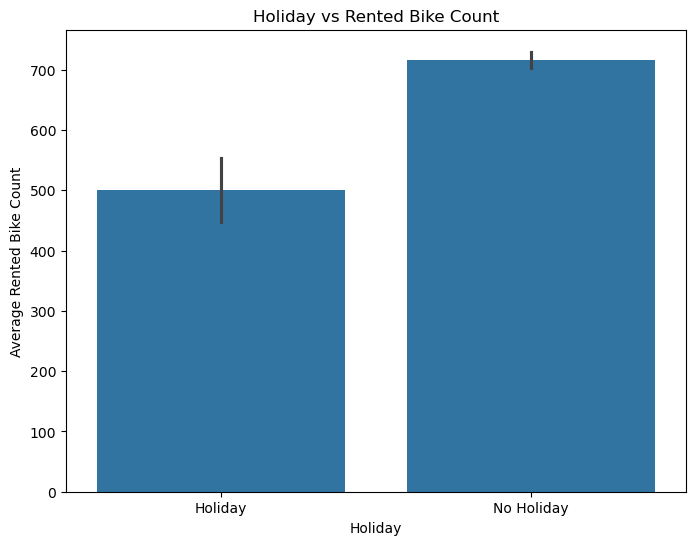

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday', y='Rented Bike Count', data=data)
plt.title('Holiday vs Rented Bike Count')
plt.xlabel('Holiday')
plt.ylabel('Average Rented Bike Count')
plt.show()

#### Bar plot for Functioning Day vs Rented Bike Count

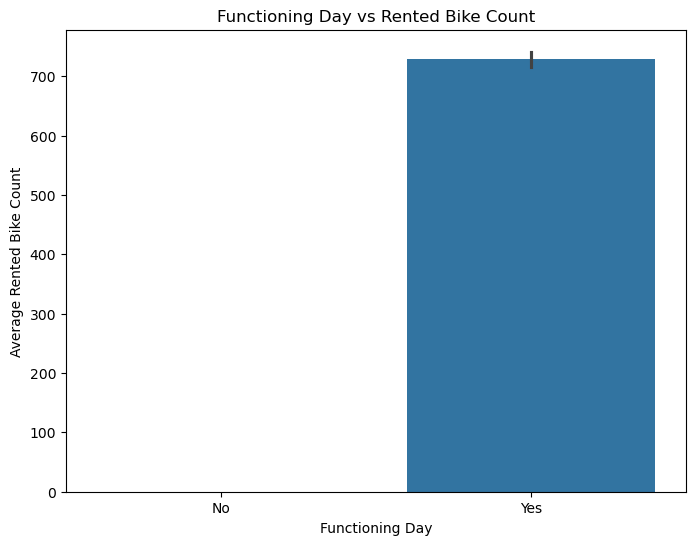

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Functioning Day', y='Rented Bike Count', data=data)
plt.title('Functioning Day vs Rented Bike Count')
plt.xlabel('Functioning Day')
plt.ylabel('Average Rented Bike Count')
plt.show()

### Time Series Analysis

Explore how rentals vary by hour, day of the week, and month.

#### Rented Bike Count by hour

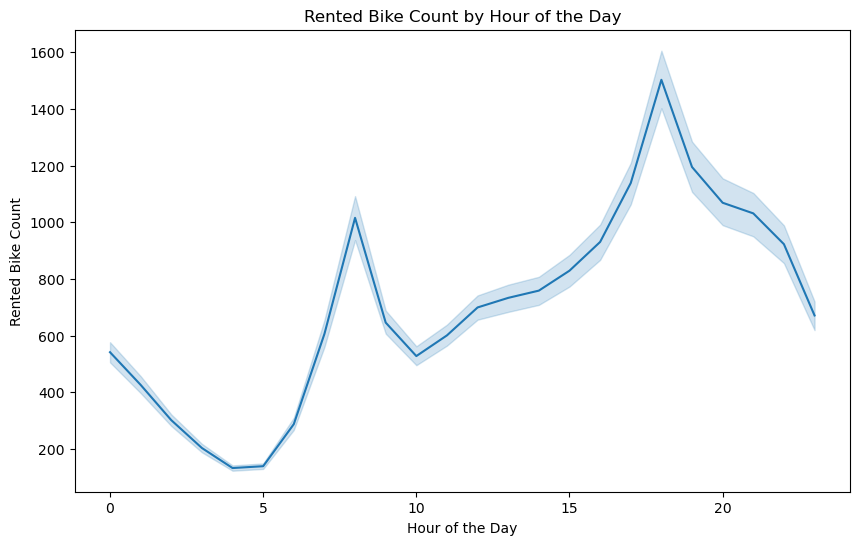

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Rented Bike Count', data=data)
plt.title('Rented Bike Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Rented Bike Count')
plt.show()

#### Rented Bike Count by day of the week

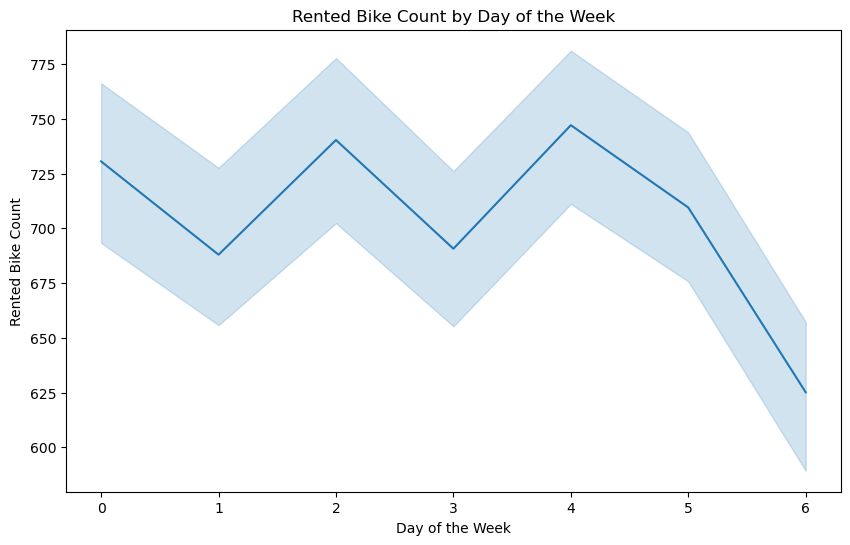

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='DayOfWeek', y='Rented Bike Count', data=data)
plt.title('Rented Bike Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Rented Bike Count')
plt.show()

#### Rented Bike Count by month

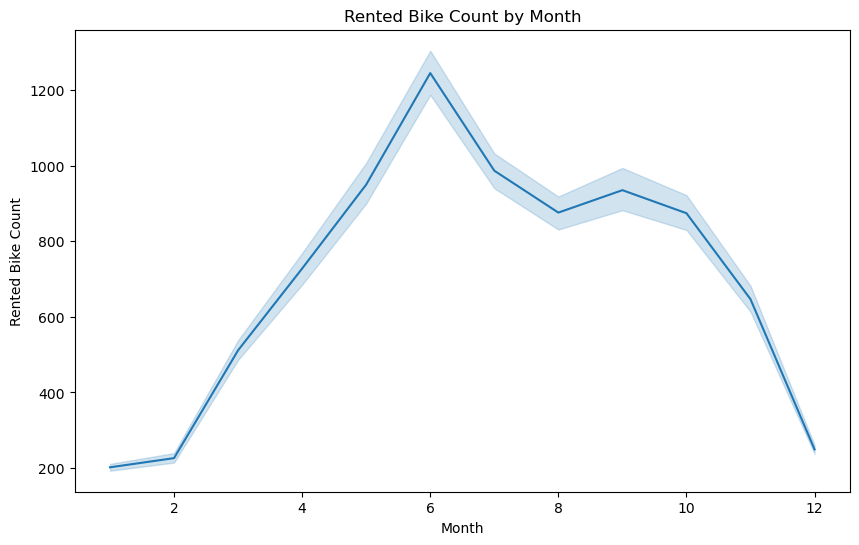

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Rented Bike Count', data=data)
plt.title('Rented Bike Count by Month')
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.show()

### Outlier Detection

Identify outliers in the dataset

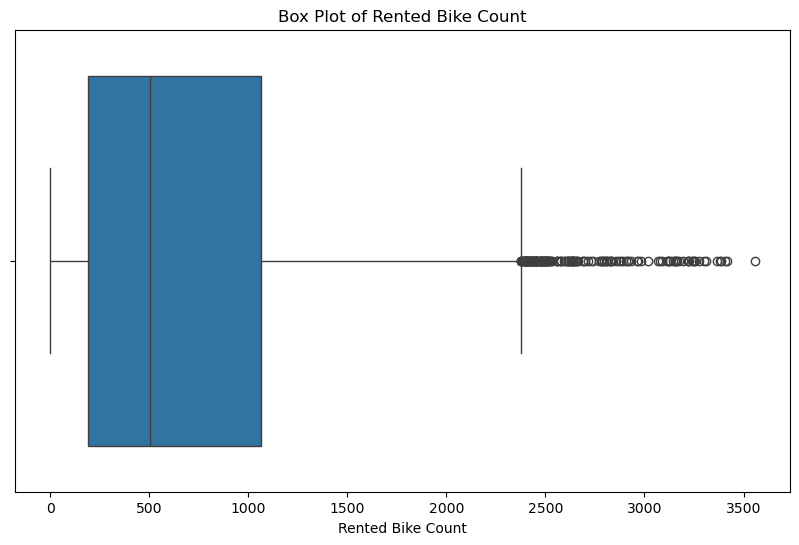

In [22]:
# Box plot for Rented Bike Count
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Rented Bike Count'])
plt.title('Box Plot of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.show()

## 5. Data Cleaning and Preprocessing

### One-hot encoding for categorical 

Apply one-hot encoding to transform categorical variables into a format that can be provided to ML models.

In [23]:
# Create the ColumnTransformer with OneHotEncoder for the categorical columns
categorical_features = ['Seasons', 'Holiday', 'Functioning Day'] 

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Fit and transform the data
fit_transform_data = ct.fit_transform(data)

# Get feature names from OneHotEncoder and combine with remainder column names
ohe_columns = ct.named_transformers_['encoder'].get_feature_names_out(categorical_features)
non_categorical_features = data.drop(columns=categorical_features).columns
new_columns = np.concatenate((ohe_columns, non_categorical_features))

# Create the new DataFrame
data_transformed = pd.DataFrame(fit_transform_data, columns=new_columns)

In [24]:
data_transformed.head()

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,Date,Rented Bike Count,...,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,DayOfWeek
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2017-12-01,254,...,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,4
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2017-12-01,204,...,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,4
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2017-12-01,173,...,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,4
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2017-12-01,107,...,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,4
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2017-12-01,78,...,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,4


In [25]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Seasons_Autumn             8760 non-null   object        
 1   Seasons_Spring             8760 non-null   object        
 2   Seasons_Summer             8760 non-null   object        
 3   Seasons_Winter             8760 non-null   object        
 4   Holiday_Holiday            8760 non-null   object        
 5   Holiday_No Holiday         8760 non-null   object        
 6   Functioning Day_No         8760 non-null   object        
 7   Functioning Day_Yes        8760 non-null   object        
 8   Date                       8760 non-null   datetime64[ns]
 9   Rented Bike Count          8760 non-null   object        
 10  Hour                       8760 non-null   object        
 11  Temperature(°C)            8760 non-null   object        
 12  Humidi

### Scale numerical 

Normalize or standardize numerical features to have a similar scale.

In [26]:
scaler = StandardScaler()
numerical_columns = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
                     'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)',
                     'Rainfall(mm)', 'Snowfall (cm)', 'Rented Bike Count']
data_transformed[numerical_columns] = scaler.fit_transform(data_transformed[numerical_columns])
print("\nDataset after scaling numerical features:")
data_transformed.head()


Dataset after scaling numerical features:


,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,Date,Rented Bike Count,...,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,DayOfWeek
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2017-12-01,-0.698650,...,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,12,4
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2017-12-01,-0.776175,...,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,12,4
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2017-12-01,-0.824240,...,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,12,4
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2017-12-01,-0.926571,...,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,12,4
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2017-12-01,-0.971535,...,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,12,4


In [27]:
X = data_transformed.drop(['Rented Bike Count', 'Date'], axis=1)  # Features
y = data_transformed['Rented Bike Count']  # Target variable

## 6. Save Transformed and Clean Data

Save the cleaned and transformed data to a new CSV file for use in subsequent analysis or modeling.

In [28]:
data_transformed.to_csv('../dataset/processed_data.csv', index=False)

# Split into Training, Validation and Test set

In [29]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)